In [3]:
import os
import time
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

from feature_creation import *

# Dash modules
import dash
import dash_table
import dash_core_components as dcc
import dash_html_components as html
from jupyter_dash import JupyterDash
import plotly.express as px

# Set up jupyter proxy
JupyterDash.infer_jupyter_proxy_config()

%matplotlib inline

In [5]:
# Creating stock_df from feature file
stock_df = daily_features()
stock_df.head()

,Close,Dividends,High,Low,Open,Stock Splits,Volume,sector,test,ticker,SMA_5,SMA_15,SMA_ratio,SD,upperband,lowerband
Date,,,,,,,,,,,,,,,,
1990-02-16,0.057364,0.0,0.059298,0.054786,0.0,0.0,940636800.0,Technology,NaN,CSCO,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-20,0.059297,0.0,0.059297,0.055430,0.0,0.0,151862400.0,Technology,NaN,CSCO,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-21,0.058008,0.0,0.058653,0.056075,0.0,0.0,70531200.0,Technology,NaN,CSCO,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-22,0.058653,0.0,0.060586,0.058653,0.0,0.0,45216000.0,Technology,NaN,CSCO,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-23,0.058331,0.0,0.059297,0.058008,0.0,0.0,44697600.0,Technology,NaN,CSCO,0.058331,NaN,NaN,NaN,NaN,NaN


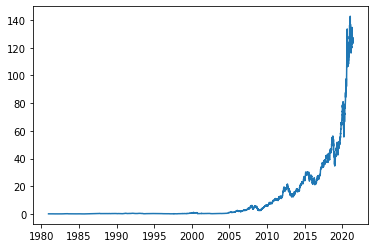

In [9]:
# Plotting one ticker to ensure data looks correct
plt.plot(stock_df[stock_df['ticker']=='AAPL']['Date'], stock_df[stock_df['ticker']=='AAPL']['Close'])

In [1]:
stock_df.tail(20)

NameError: name 'stock_df' is not defined